## 9.7

$p(t)=Ae^{-\beta t}$

**a)** To express $A$ ,the normalization constant, in terms of $\beta$ we will use the fact that the integral of the probability density function (PDF) over t=0 to infinity must be equal to 1. 

 $\int_0^{\infty}p(t)dt = \int_0^{\infty}Ae^{-\beta t}dt = 1  \rightarrow \int_0^{\infty}e^{-\beta t}dt = [-\frac{1}{\beta} e^{-\beta t}]|^{\infty}_0 = 0 -\frac{1}{\beta} = \frac{1}{\beta}$

**So we get $A = \beta$**

The unit of a PDF is the inverse of the unit of variable, in this case - time. In addition, $\beta$ is the rate of the exponential distribution. So [A] = [$\beta$] = $\frac{1}{t}$.

**b)** Given the waiting times $t_1,...,t_5$ and assuming they are independent, the per measurement likelihood is $L(t_i;\beta) = \beta e^{-\beta t_i}$. The overall likelihood for the series is the product of per-measurement likelihoods:
$$
\prod_{i=1}^5 L(t_i;\beta) = \beta^5 e^{-\beta \sum_{i=1}^5 t_i}$
$$
**c)** To find the maximum-likelihood we can maximize the natural logarithm of the likelihood:

$$
ln(\prod_{i=1}^5 L(t_i;\beta)) = 5 ln(\beta) - \beta \sum_{i=1}^5 t_i$
$$
deriving and comparing to zero:
$$
0 = \frac{5}{\beta} -  \sum_{i=1}^5 t_i \\
\beta = \frac{5}{\sum_{i=1}^5 t_i} = \frac{1}{\bar{t}}
$$
So we got that the rate is the inverse of the average waiting time.

## 9.12

#### a)

Green


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
bins_center,0.500000,1.500000,2.500000,3.500000,4.500000,5.500000,6.500000,7.500000,8.500000,9.500000,10.500000,11.500000,12.500000,13.500000
counts,39.000000,36.000000,31.000000,19.000000,14.000000,8.000000,5.000000,3.000000,6.000000,3.000000,1.000000,3.000000,1.000000,1.000000
probs,0.229412,0.211765,0.182353,0.111765,0.082353,0.047059,0.029412,0.017647,0.035294,0.017647,0.005882,0.017647,0.005882,0.005882


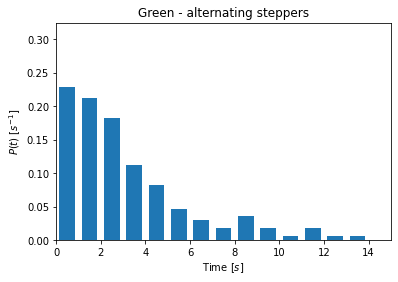

In [8]:
green = pd.read_csv('yildizHistoGreen.csv', header=None, names=['bins_center', 'counts'])
red = pd.read_csv('yildizHistoRed.csv', header=None, names=['bins_center', 'counts'])
green['probs'] = green['counts'] / green['counts'].sum()
red['probs'] = red['counts'] / red['counts'].sum()

print('Green')

plt.bar('bins_center', 'probs', width=0.7, data=green)
plt.xlabel('Time $[s]$')
plt.ylabel('$P(t)$ $[s^{-1}]$')
plt.title('Green - alternating steppers')

plt.xlim((0, 15))
plt.ylim((0, 0.325))

green.T

Red


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
bins_center,0.25,0.750000,1.250000,1.750000,2.250000,2.750000,3.250000,3.75000,4.250000,4.750000,...,22.75,23.25000,23.75,24.25,24.75,25.25,25.75000,26.25,26.75000,27.25
counts,0.00,11.000000,15.000000,19.000000,22.000000,23.000000,23.000000,20.00000,15.000000,18.000000,...,0.00,1.00000,0.00,0.00,0.00,0.00,1.00000,0.00,1.00000,0.00
probs,0.00,0.033435,0.045593,0.057751,0.066869,0.069909,0.069909,0.06079,0.045593,0.054711,...,0.00,0.00304,0.00,0.00,0.00,0.00,0.00304,0.00,0.00304,0.00


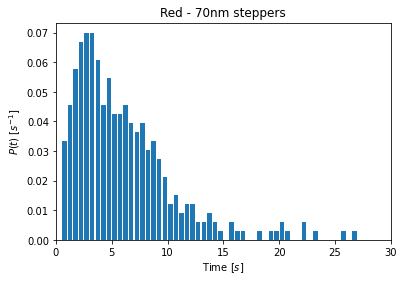

In [9]:
green.T

print('Red')

plt.bar('bins_center', 'probs', width=0.4, data=red)
plt.xlabel('Time $[s]$')
plt.ylabel('$P(t)$ $[s^{-1}]$')
plt.title('Red - 70nm steppers')

plt.xlim((0, 30))

red.T

#### b)

In [12]:
g_mean = np.sum(green['probs'] * green['bins_center'])
g_beta = 1/g_mean
print(f'Beta = {g_beta: .2f}, which is the inverse of the average {g_mean: .2f}')

Beta =  0.32, which is the inverse of the average  3.12


#### c)

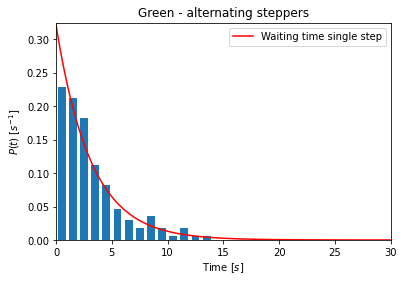

In [13]:
g_grid = np.linspace(0, 30, 30 * 5)

plt.bar('bins_center', 'probs', width=0.7, data=green)
plt.xlabel('Time $[s]$')
plt.ylabel('$P(t)$ $[s^{-1}]$')
plt.title('Green - alternating steppers')

plt.xlim((0, 30))
plt.ylim((0, 0.325))

_ = plt.plot(g_grid, g_beta * np.exp(-g_beta * g_grid), c='r', label='Waiting time single step')
plt.legend()
plt.show()

**d)** Assuming every other step is missing, the real average waiting time is half of the observed average waiting time.

Beta =  0.33, which is the inverse of half the average  6.05


[]

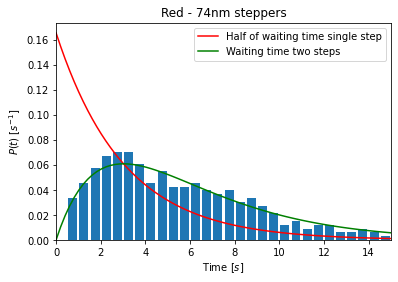

In [14]:
r_observed_mean = np.sum(red['probs'] * red['bins_center'])
r_true_mean = r_observed_mean / 2
r_beta = 1/r_true_mean
print(f'Beta = {r_beta: .2f}, which is the inverse of half the average {r_observed_mean: .2f}')

r_grid = np.linspace(0, 15, 15*5)

plt.bar('bins_center', 'probs', width=0.4, data=red)
plt.xlabel('Time $[s]$')
plt.ylabel('$P(t)$ $[s^{-1}]$')
plt.title('Red - 74nm steppers')

plt.xlim((0, 15))

plt.plot(r_grid, 0.5 * r_beta * np.exp(-r_beta * r_grid), c='r', label='Half of waiting time single step')
plt.plot(r_grid, r_beta**2 / 2 * r_grid * np.exp(-r_beta * r_grid), c='g', label='Waiting time two steps')

plt.legend()
plt.plot()

**e)** The $\beta$s are similar, matches the hypothesis of a hidden step, and fits the gamma distribution.

**f)** For m=10 we would expect to have a gamma distribution with the same rate and a shape parameter of 10. Because this is a sum of probabilities with limited variance, following the central limit theorem, we expect a mean of $10 \beta$ and an approximately Gaussian distribution centered around that mean, with a variance of $10 \beta^{-2}$.

## 10C (for 10.4 and 10.6)

In [1]:
# import os
# import copy
# from pathlib import Path
# from numbers import Number
# from collections import namedtuple
# from typing import NamedTuple, List, Callable, Tuple, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import seaborn as sns

# from matplotlib import rc
# from IPython.display import HTML
# plt.matplotlib.rcParams['animation.embed_limit'] = 2**128

# from scipy.special import factorial
# from google.colab import drive

rng = np.random.default_rng()


In [2]:
def gillespieSimulation(T,lini,beta,k):

    ts = [0]  # Transition times
    ls = [lini]  # Corresponding molecule counts

    t = 0
    while t < T:
        rates = beta_s, k_c * lini
        total_rate = sum(rates)
        if total_rate == 0:
            next_t = float('inf')  # No more reactions can occur
        else:
            next_t = np.random.exponential(1 / total_rate)
        if t + next_t > T:
            break  # Stop if the next reaction time exceeds T
        t += next_t
        ts.append(t)
        probabilities = [rate / total_rate for rate in rates]
        chosen_reaction = np.random.choice([0, 1], p=probabilities)
        if chosen_reaction == 0:  # Reaction of type s
            lini += 1
        else:  # Reaction of type c
            if lini > 0:
                lini -= 1
        ls.append(lini)

    return np.array(ts), np.array(ls)


In [3]:
def wrapper(repeats, T, lini, beta,k):
  dfs = []
  for repeat in range(repeats):
    ts, states = gillespieSimulation(T, lini, beta,k)

    dfs.append(pd.DataFrame(states, columns=['mRNA']))
    dfs[-1].insert(0, 'repeat', repeat)
    dfs[-1].insert(1, 'time', ts)

  return pd.concat(dfs).reset_index(drop=True)

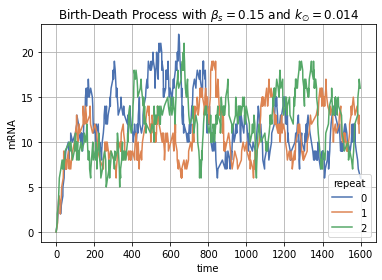

In [6]:
beta_s = 0.15  # beta_synthesis [min^-1]
k_c = 0.014  # clearance_rate [min^-1]
lini = 0
repeats = 3
T = 1600

results = wrapper(repeats, T, lini, beta_s, k_c)

g = sns.lineplot(x='time', y='mRNA', hue='repeat', data=results, palette='deep')
plt.grid()
plt.title(fr'Birth-Death Process with $\beta_s={beta_s}$ and $k_{{\varnothing}}={k_c}$')
plt.show()

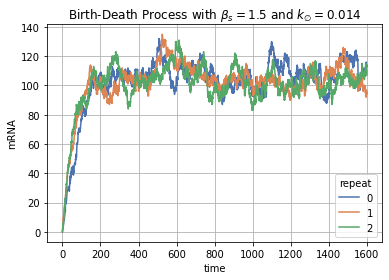

In [7]:
beta_s = 1.5  # beta_synthesis [min^-1]
k_c = 0.014  # clearance_rate [min^-1]
lini = 0
repeats = 3
T = 1600

results = wrapper(repeats, T, lini, beta_s, k_c)

g = sns.lineplot(x='time', y='mRNA', hue='repeat', data=results, palette='deep')
plt.grid()
plt.title(fr'Birth-Death Process with $\beta_s={beta_s}$ and $k_{{\varnothing}}={k_c}$')
plt.show()

## 10.4

In [11]:
beta_s = 0.15  # beta_synthesis [min^-1]
k_c = 0.014  # clearance_rate [min^-1]
lini = 0
repeats = 300
T = 300

results = wrapper(repeats, T, lini, beta_s, k_c)
results

,repeat,time,mRNA
0,0,0.000000,0
1,0,1.505941,1
2,0,3.413798,2
3,0,7.586607,3
4,0,11.313338,4
...,...,...,...
24046,299,297.373876,18
24047,299,297.606941,19
24048,299,298.132259,20
24049,299,299.050403,19


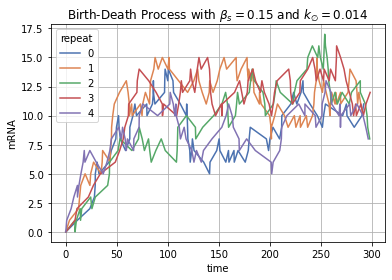

In [10]:
g = sns.lineplot(x='time', y='mRNA', hue='repeat', palette='deep', data=results[results.repeat < 5])
plt.grid()
plt.title(fr'Birth-Death Process with $\beta_s={beta_s}$ and $k_{{\varnothing}}={k_c}$')
plt.show()

In [12]:
grid = np.arange(0, 300, 1)
means = np.zeros_like(grid, dtype='float')
stds = np.zeros_like(grid, dtype='float')
for i, t in enumerate(grid):
  idxmax = results[results.time <= t].groupby(['repeat'], sort=False)['time'].idxmax()
  mRNA = results.loc[idxmax, 'mRNA']
  means[i] = mRNA.mean()
  stds[i] = mRNA.std()
means[:5]

array([0.        , 0.17333333, 0.3       , 0.45666667, 0.64      ])

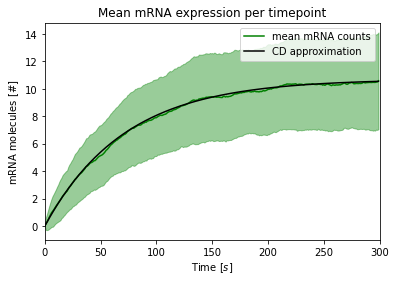

In [13]:
plt.plot(grid, means, c='g', label='mean mRNA counts')
plt.fill_between(grid, means + stds, means - stds, color='g', alpha=0.4)

plt.plot(grid, (beta_s/k_c)*(1-np.exp(-k_c * grid)), c='k', label='CD approximation')

plt.xlim((0, 300))
plt.xlabel('Time $[s]$')
plt.ylabel('mRNA molecules $[\#]$')

plt.title('Mean mRNA expression per timepoint')
plt.legend()
plt.show()

## 10.6

In [14]:
idx_first_nonzero = results[results['mRNA'] > 0].groupby(['repeat'], sort=False)['time'].idxmin()
first_molecule_time = results.loc[idx_first_nonzero, 'time'].values
first_molecule_time[:4]

array([ 1.50594129,  0.78029827, 14.06010196, 12.07213235])

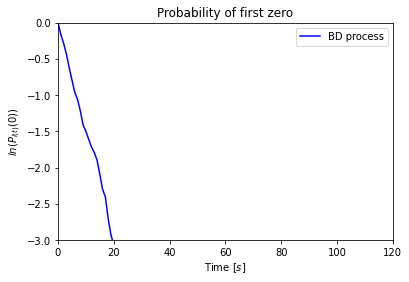

In [15]:
grid_BD = np.arange(0, 120, 1)

p_zeros_BD = (grid_BD[:, None] < first_molecule_time[None, :]).sum(axis=1) / len(first_molecule_time)
p_zeros_BD = np.log(p_zeros_BD + 1e-5)

plt.plot(grid_BD, p_zeros_BD, c='b', label='BD process')

plt.xlim((0, 120))
plt.xlabel('Time $[s]$')

plt.ylim((-3, 0))
plt.ylabel('$ln(P_{l(t)}(0))$')

plt.title('Probability of first zero')
plt.legend()
plt.show()

The simulated graph doesn't resemble the experimental data at all.

## 10.7

In [31]:
def burstingSimulation(T, lini, beta_start, beta_stop, k_c):
    
    beta_s = 5 * beta_stop  # Bursting transcription rate (per minute)

    # Function to calculate reaction rates
    def reaction_rates(gene_state, mRNA_count):
        if gene_state == "off":
            return beta_start, 0, 0, k_c * mRNA_count
        elif gene_state == "on":
            return beta_s, beta_stop, 0, k_c * mRNA_count

    # Function to determine the next reaction time
    def next_reaction_time(gene_state, mRNA_count):
        rates = reaction_rates(gene_state, mRNA_count)
        total_rate = sum(rates)
        if total_rate == 0:
            return float('inf')  # No more reactions can occur
        else:
            return np.random.exponential(1 / total_rate)

    ts = [0]  # Array to store transition times
    gene_states = ["off"]  # Array to store gene states
    mRNA_count = [0]      # Array to store mRNA counts
    genes_count = [1]  # Array to store the number of genes at each transition time
    active_genes_count = [0]  # Array to store the number of genes in "on" state at each transition time

    t = 0
    while t < T:
        next_t = next_reaction_time(gene_states[-1], mRNA_count[-1])
        if t + next_t > T:
            break  # Stop if the next reaction time exceeds T
        t += next_t
        ts.append(t)
        rates = reaction_rates(gene_states[-1], mRNA_count[-1])
        total_rate = sum(rates)
        probabilities = [rate / total_rate for rate in rates]
        chosen_reaction = np.random.choice(range(len(rates)), p=probabilities)
        gene_states.append(gene_states[-1])  # Gene state remains the same until changed by a reaction
        mRNA_count.append(mRNA_count[-1])    # mRNA count remains the same until changed by a reaction
        genes_count.append(genes_count[-1])  # Number of genes remains the same until changed by a reaction
        if gene_states[-1] == "off" and chosen_reaction == 0:  # Gene activation
            gene_states[-1] = "on"
            genes_count[-1] += 1
            active_genes_count.append(active_genes_count[-1] + 1)
        elif gene_states[-1] == "on" and chosen_reaction == 1:  # Gene deactivation
            gene_states[-1] = "off"
            genes_count[-1] -= 1
            active_genes_count.append(active_genes_count[-1] - 1)
        else:
            active_genes_count.append(active_genes_count[-1])

        if gene_states[-1] == "on" and chosen_reaction == 0:  # Transcription
            mRNA_count[-1] += 1
        elif gene_states[-1] == "on" and chosen_reaction == 3:  # mRNA degradation
            mRNA_count[-1] -= 1
            if mRNA_count[-1] < 0:
                mRNA_count[-1] = 0

    return np.array(ts), np.array(mRNA_count), np.array(genes_count), np.array(active_genes_count)


In [43]:
def burstWrapper(repeats, T, lini, beta_start, beta_stop, k_c):
  dfs = []
  for repeat in range(repeats):
    ts, mRNA_count, genes_count, active_genes_count = burstingSimulation(T, lini, beta_start, beta_stop, k_c)

    dfs.append(pd.DataFrame({'mRNA':mRNA_count,'genes_count':genes_count,'active_genes_count':active_genes_count}))
    dfs[-1].insert(0, 'repeat', repeat)
    dfs[-1].insert(1, 'time', ts)

  return pd.concat(dfs).reset_index(drop=True)

In [44]:
ts, mRNA_count, genes_count, active_genes_count = burstingSimulation(T, lini, beta_start, beta_stop, k_c)

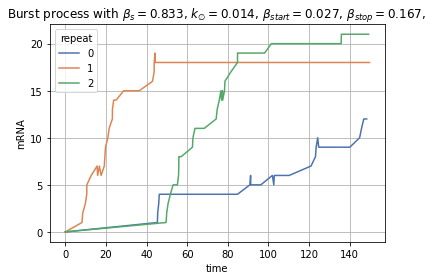

In [54]:
beta_start = 1 / 37  # Transcription initiation rate (per minute)
beta_stop = 1 / 6   # Transcription termination rate (per minute)
k_c = np.log(2) / 50  # mRNA clearance rate (per minute)
beta_s = 5 * beta_stop  # Bursting transcription rate (per minute)

lini = 0
T = 150
repeats = 3

results = burstWrapper(repeats, T, lini, beta_start, beta_stop, k_c)

g = sns.lineplot(x='time', y='mRNA', hue='repeat', data=results, palette='deep')
plt.grid()
plt.title(fr'Burst process with $\beta_s={beta_s: .3f}$, $k_{{\varnothing}}' + \
          fr'={k_c: .3f}$, $\beta_{{start}}={beta_start: .3f}$, ' + \
          fr'$\beta_{{stop}}={beta_stop: .3f}$, ')
plt.show()

In [57]:
repeats = 300

results = burstWrapper(repeats, T, lini, beta_start, beta_stop, k_c)

grid = np.arange(0, 150, 1)
means = np.zeros_like(grid, dtype='float')
stds = np.zeros_like(grid, dtype='float')

for i, t in enumerate(grid):
  idxmax = results[results.time <= t].groupby(['repeat'], sort=False)['time'].idxmax()
  mRNA = results.loc[idxmax, 'mRNA'].values
  means[i] = mRNA.mean()
  stds[i] = mRNA.std()

means[:5]

array([0.        , 0.03333333, 0.07      , 0.12333333, 0.18333333])

The Fano factor is  5.43


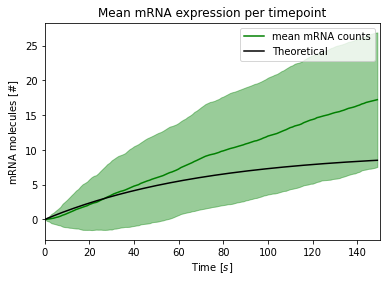

In [58]:
plt.plot(grid, means, c='g', label='mean mRNA counts')
plt.fill_between(grid, means + stds, means - stds, color='g', alpha=0.4)

plt.plot(grid, ((beta_s/beta_stop) * beta_start/k_c)*(1-np.exp(-k_c * grid)), c='k', label='Theoretical')

plt.xlim((0, 150))
plt.xlabel('Time $[s]$')
plt.ylabel('mRNA molecules $[\#]$')

plt.title('Mean mRNA expression per timepoint')
plt.legend()

print(f'The Fano factor is {stds[-1]**2/means[-1]: .2f}')
plt.show()

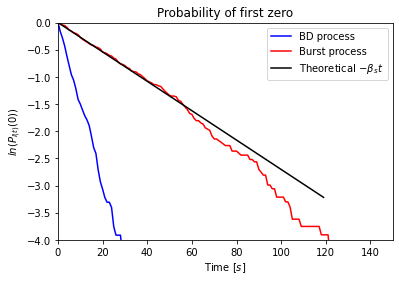

In [59]:
idx_first_nonzero = results[results['mRNA'] > 0].groupby(['repeat'], sort=False)['time'].idxmin()
first_molecule_time = results.loc[idx_first_nonzero, 'time'].values

# grid = np.arange(0, 150, 1)

p_zeros_burst = (grid[:, None] < first_molecule_time[None, :]).sum(axis=1) / len(first_molecule_time)
p_zeros_burst = np.log(p_zeros_burst + 1e-5)

plt.plot(grid_BD, p_zeros_BD, c='b', label='BD process')
plt.plot(grid, p_zeros_burst, c='r', label='Burst process')
plt.plot(grid_BD, -beta_start*grid_BD, c='k', label='Theoretical $-\\beta_s t$')

plt.xlim((0, 150))
plt.xlabel('Time $[s]$')

plt.ylim((-4, 0))
plt.ylabel('$ln(P_{l(t)}(0))$')

plt.title('Probability of first zero')
plt.legend()
plt.show()

## 10.11

In [ ]:
rawData = np.load(np.DataSource().open('GoldingData.npz', "rb"))
data = dict(rawData.items())

dfs = []
for i in range(1, 4):
    dfs.append(pd.DataFrame(data['panelA'+str(i)], columns=['time', 'sample_mean']))
    dfs[-1].insert(0, 'trial', i)
df_panelA = pd.concat(dfs).reset_index(drop=True)
df_panelA

df_panelC = pd.DataFrame(data['panelC'], columns=['log_10_mean', 'log_10_var'])
df_panelC

dfs = []
for i in range(1, 4):
    dfs.append(pd.DataFrame(data['panelD'+str(i)], columns=['time', 'log_p_zero']))
    dfs[-1].insert(0, 'trial', i)
df_panelD = pd.concat(dfs).reset_index(drop=True)
df_panelD



